<a href="https://colab.research.google.com/github/nse-yu/colab-ML/blob/main/NNcreate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニューラルネットワーク構築

In [ ]:
import numpy as np

#### Numpyの多次元配列を用いてニューラルネットワークを作る

##### numpyの練習

> １次元配列を作る

In [ ]:
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A)) #配列の次元数を返す  
print(A.shape)

[1 2 3 4]
1
(4,)


> ２次元配列を作る

In [ ]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


> 内積（ドット積）を計算する  
  
<u>内積は行列A,Bについて、Aの列数＝Bの行数が成り立てば計算可能</u>

In [ ]:
# 同じ形状
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])  
print(np.dot(A,B))

[[19 22]
 [43 50]]


In [ ]:
# 違う形状  
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
print(np.dot(A,B))

[[22 28]
 [49 64]]


##### いざ、実装

> ニューラルネットワーク前提  
  
今回は、バイアスと活性化関数を省略、重みだけがあるとする。

In [ ]:
X = np.array([1,2]) #1×2
W = np.array([[1,3,5],[2,4,6]]) #2×3
print(X.shape,W.shape)  

#内積の計算
Y = np.dot(X,W)
print(Y)

(2,) (2, 3)
[ 5 11 17]


入力層の２つのニューロンそれぞれの重みの行列をW,  
入力層の入力をX,    
各ニューロンへの入力にかけられるバイアスの行列をB,  

隠れ層の３つのニューロンへの入力をAとすると、第一層のニューロンへの入力は、  
***
A = XW + B  
***   
と表すことができる。

In [ ]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])  

# 入力層の出力
A1 = np.dot(X,W1) + B1  

第一層への入力を、シグモイド関数で活性化させる。

In [ ]:
# シグモイド関数はこれだけでいい
def sigmoid(x):
  return 1/(1+np.exp(-x))    

Z1 = sigmoid(A1)
print(Z1) # 第一層の３つのニューロンそれぞれの活性化関数の出力

[0.57444252 0.66818777 0.75026011]


同様に、第一層から第二層への出力も実装

In [ ]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])  

# 第二層への出力  
A2 = np.dot(Z1,W2) + B2  
Z2 = sigmoid(A2)

最後に、第二層から出力層への出力を実装する  
  
ただし、出力層の活性化関数は、これまでの層とは異なる実装をする。  
*** 
一般的に、ニューラルネットワークでは、解決する問題によって、出力層で用いる活性化関数が異なる。  
分類問題では、一般的には「恒等関数」を、分類問題では「ソフトマックス関数」を用いる。


In [ ]:
# ただ入力をそのまま流すだけの関数（恒等関数）
def identity_function(x):
  return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3) # ここまでが一連の出力

> ここまでの実装をまとめる

In [ ]:
# ニューラルネットワークの各重み、バイアスを初期化する
def init_network():
  network = {}
  network["W1"] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])  
  network["b1"] = np.array([0.1,0.2,0.3])  
  network["W2"] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])  
  network["b2"] = np.array([0.1,0.2])  
  network["W3"] = np.array([[0.1,0.3],[0.2,0.4]])  
  network["b3"] = np.array([0.1,0.2])  
  return network

# ネットワーク計算
def forward(network,x):
  W1,W2,W3 = network["W1"],network["W2"],network["W3"]
  b1,b2,b3 = network["b1"],network["b2"],network["b3"]

  a1 = np.dot(x,W1) + b1
  z1 = sigmoid(a1)

  a2 = np.dot(Z1,W2) + b2
  z2 = sigmoid(a2)

  a3 = np.dot(z2,W3) + b3
  y = identity_function(a3)

  return y  

network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y)

[0.31682708 0.69627909]


### MNISTデータセットでニューラルネットワーク

手書き文字の分類をやってみよう。  
用件：<u>ニューロン数</u>  
* 入力層：28×28 = 784  
* 出力層：10クラス分類（0～9）より、10とする  
* 中間層：１つ目（50個）、２つ目（100個）

In [ ]:
from tensorflow.keras.datasets import mnist

### 損失関数

> 損失関数

１．平均二乗誤差    
![img](https://assets.st-note.com/production/uploads/images/24199642/picture_pc_00fb7e2e324cd5ef0099cae0c3d775fb.png)  

In [ ]:
def mean_squared_error(y,t):
  return 0.5 * sum((y - t) **2)

２．クロスエントロピー誤差  
![img](https://assets.st-note.com/production/uploads/images/24201099/picture_pc_7105dc47dd021e875dfbd2407b0078fc.png)

In [ ]:
def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
    batch_size = y.shape[0]
  return -np.sum(t * np.log(y)) / batch_size #-Infを防ぐ微小値delta  
  #バッチまるごと受け取りつつ、バッチサイズ分の平均をとることで、実質１入力の誤差としている。

２つの損失関数を動作比較

In [ ]:
y = [0.1,0.05,0.6,0,0.05,0.3,0.1,0,0,0]
t = [0,0,0,0,0.1,0.05,0.4,0.2,0.0,0]

print(mean_squared_error(np.array(y),np.array(t)))
cross_entropy_error(np.array(y),np.array(t))

0.28375000000000006


4.504424418294715

３．ソフトマックス関数  
![img](https://cdn-ak.f.st-hatena.com/images/fotolife/n/nok-0930-ss/20171203/20171203173559.png)

In [ ]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c) # overflow対策
  sum_exp_a = np.sum(exp_a)
  return exp_a / sum_exp_a

## 練習スペース

> 関数定義

In [ ]:
def getReprocessData(normalize=False,flatten=True):
  (x_train,t_train),(x_test,t_test) = mnist.load_data()
  #基本的な情報
  print("===========train data===========") 
  print("img  :",x_train.shape) #画像
  print("label: ",t_train.shape) #対応するラベル
  print("============test data===========") 
  print("img  :",x_test.shape) #画像
  print("label:",t_test.shape) #対応するラベル

  if flatten == True:
    print("--------------------------------")
    print(f"processing..... -> fixed: {x_train.shape} ⇔ {x_train.reshape(60000,-1).shape}")
    x_train = x_train.reshape(60000,-1)
    print(f"processing..... -> fixed: {x_test.shape} ⇔ {x_test.reshape(10000,-1).shape}")
    x_test = x_test.reshape(10000,-1)

  if normalize == True and flatten == True:
    print("--------------------------------")
    x_train = x_train/255
    x_test = x_test/255
    print(f"confirm: x_train maxElement = {x_train.max()}, x_test maxElement = {x_test.max()}")
    
  print("------------FINISHED------------")

  return (x_train,t_train),(x_test,t_test)

In [ ]:
import pickle
def init_network():
  with open("sample_weight.pkl","rb") as f:
    network = pickle.load(f)
    return network

In [ ]:
def predict(network,x,log=True):
  W1,W2,W3 = network["W1"],network["W2"],network["W3"]
  b1,b2,b3 = network["b1"],network["b2"],network["b3"]
  if log == True:
    print("/===============START epoch===============/")
    print(f"W1.shape={W1.shape}, W2.shape={W2.shape}, W3.shape={W3.shape}")
    print(f"b1.shape={b1.shape}, b2.shape={b2.shape}, b3.shape={b3.shape}")
    print(f"In ===> x.shape={x.shape}")

  a1 = np.dot(x,W1) + b1
  z1 = sigmoid(a1)

  a2 = np.dot(z1,W2) + b2
  z2 = sigmoid(a2)

  a3 = np.dot(z2,W3) + b3
  y = softmax(a3)
  if log == True:
    print(f"a2.shape={a2.shape}, z2.shape={z2.shape}")
    print(f"a1.shape={a1.shape}, z1.shape={z1.shape}")
    print(f"a3.shape={a3.shape}, y.shape={y.shape}")

    print("/=============END epoch==============/")

  return y  

> 前処理後のデータを取得

In [ ]:
(x_train,t_train),(x_test,t_test) = getReprocessData(normalize=True)
print(x_train.shape)
print(np.unique(t_train))
print(t_train)

===========train data===========
img  : (60000, 28, 28)
label:  (60000,)
============test data===========
img  : (10000, 28, 28)
label: (10000,)
--------------------------------
processing..... -> fixed: (60000, 28, 28) ⇔ (60000, 784)
processing..... -> fixed: (10000, 28, 28) ⇔ (10000, 784)
--------------------------------
confirm: x_train maxElement = 1.0, x_test maxElement = 1.0
------------FINISHED------------
(60000, 784)
[0 1 2 3 4 5 6 7 8 9]
[5 0 4 ... 5 6 8]


> 初期ネットワークの取得

In [ ]:
network = init_network() #重みの初期値が格納されている  
print(network)

> 予測の開始

<u>ベータ版</u>

In [ ]:
accuracy_cnt = 0
for i in range(len(x_test)):
  y = predict(network,x_test[i])
  p = np.argmax(y)
  if p == t_test[i]:
    accuracy_cnt += 1
print("Accuracy:",str(float(accuracy_cnt) / len(x_test)))

<u>バッチ処理版（こっちのほうが何倍も速い）</u>

y_batchのargmaxでaxis=1をしているところについて、  
y_batchの出力は、各繰り返しにおいて、以下のような出力となっている。   

<br> 
result_per_batch = [ [batch_data1], [batch_data2], [...] ]  
※ベータ版では、このbatch_dataを１つ１つ処理していた。  
※batch_dataにも複数の値が含まれており、その最大値を求める。  
<br>
このbatch_dataごとに最大値を出力し、以下のようにするのがaxis=1の役割である。

result_perBatch_max = [ [max1], [max2], [...] ]

In [ ]:
batch_size = 100 #バッチ（入力データの１まとまり）
accuracy_cnt = 0

for i in range(0,len(x_test),batch_size): #テストデータ数
  x_batch = x_test[i:i+batch_size]
  y_batch = predict(network,x_batch,log=False)
  p = np.argmax(y_batch,axis=1) #最大値をもつインデックスを抽出,axis=1により、１バッチの各結果ごとに最大値を取得
  accuracy_cnt += np.sum(p == t_test[i:i+batch_size])
print("Accuracy:",str(float(accuracy_cnt) / len(x_test)))

#### 微分

勾配降下法によってパラメータを最適化するにあたり、まず勾配を扱うために「**微分**」の実装をする必要がある。  
微分を実装する上で気を付ける必要があるのは、定義上発生しうる「誤差」である。  
誤差は主に２つ発生しうる。  
１．hを0に近づけるうえでの丸め誤差  
２．f(x+h)-f(x)の誤差  
<br>
これは、どちらにしても「hを極小に近づけることができない」という定義と現実の差が原因となっている。  
<br>  
***
だからといって、hをe-100とかにすると、１で紹介した「丸め誤差」が発生する。  
**丸め誤差**とは、言ってしまえば、小さすぎて見えなくなるという現象。見えないから無視されてしまう、それによって発生する誤差である。   
***
また、２に関しては、x+hとxの差が、hが極小であることによって「超微小」の差分となり、その瞬間的範囲での微分をしたいのにもかかわらず、hの限界によって、真の微分との誤差が生じてしまうというものだ。   
***  
<Br>  

その誤差をできるだけ軽くする方法として、  
１．小さすぎないhを使用する  
２．中心差分f(x+h)-f(x-h)を使用する  
というものがある。

> 誤差を考慮した微分関数

In [ ]:
def numerical_diff(f,x):
  h = 1e-4 #小さすぎないh
  return (f(x+h) - f(x-h)) / (2 * h) #中心差分を利用

> 偏微分に対応した関数  
  


In [ ]:
def numerical_gradient(f,x):
  h = 1e-4
  grad = np.zeros_like(x)   
  
  for idx in range(x.size):
    tmp_val = x[idx]
    
    #f(x+h)の計算
    x[idx] = tmp_val + h
    fxh1 = f(x)

    #f(x-h)の計算
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val 
  return grad

> 多次元対応した偏微分

In [232]:
def numerical_gradient2(f,x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad

> バッチ対応した損失関数

In [239]:
def cross_entropy_error2(y,t):
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
  
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size),t])) / batch_size #-Infを防ぐ微小値delta  
  #バッチまるごと受け取りつつ、バッチサイズ分の平均をとることで、実質１入力の誤差としている。

> 勾配降下法の実装    
  
ちなみに、訓練データの中から一部のデータのみで損失関数の評価を行う場合（ミニバッチ）、勾配降下法ではなく「**確率的勾配降下法(stochastic gradient descent)**」という。略してSGDともいう。  
だからと言ってやることは変わりなく、ただ確率的（ランダムで）に選ばれたデータに対して行う勾配降下法という意味で用いる表現。  

  
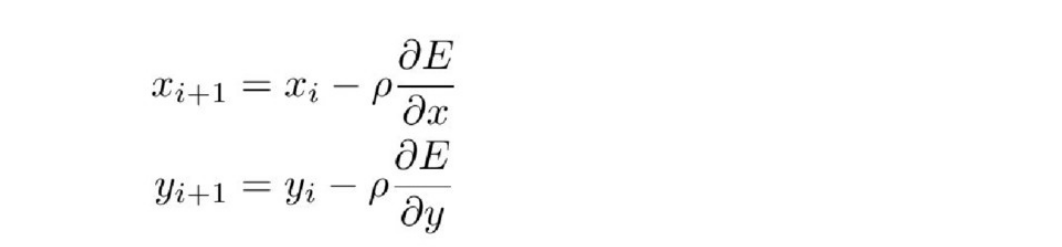

In [ ]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
  #fは最適化したい関数（損失関数）
  #lrは学習率（１学習でどれだけパラメータを更新するかの指標。手動設定する必要がある「ハイパーパラメータ」というもの。）
  #step_numは学習の繰り返し数

  x = init_x
  for i in range(step_num): 
    grad = numerical_gradient(f,x) 
    x -= lr*grad  #更新式。step_num回繰り返し、これを最適化していく。
  return x

> 勾配を求めるクラス

In [ ]:
import numpy as np

class simpleNet:
  def __init__(self):
    self.W = np.random.standard_normal((2,3))  #重みを初期化 

  #ニューロンの出力
  def predict(self,x):
    return np.dot(x,self.W)
  
  #サンプルとラベルの誤差
  def loss(self,x,t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y,t)

    return loss

> 動作確認

In [ ]:
net = simpleNet()

#重み確認
print(net.W)

#predict確認
a = np.array([0.6,0.9])
print(net.predict(a))

#loss確認
l = np.array([0,0,1])
print(net.loss(a,l))

[[-0.28474458 -1.36772479  0.92005605]
 [-2.99054779  0.24370821  0.94749072]]
[-2.86233976 -0.60129748  1.40477528]
0.13848991045705983


#### ミニバッチ処理版

バッチ処理のようにカタマリを作って一気に処理するという形ではなく、一部データのみをテストの対象とし、それを全体の近似として用いるのが「ミニバッチ処理」である。

> 60000個のテストデータから、10個のみランダムで選定する。

In [ ]:
train_size = x_train.shape[0] #60000
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size) #バッチ単位でランダム抽出するデータのindexを取得
x_batch = x_train[batch_mask] #そのindexから対応するデータを取得
t_batch = t_train[batch_mask] #同上

(784,)


> ミニバッチに対応したクロスエントロピー誤差関数

In [ ]:
def cross_entropy_error(y,t):
  if y.ndim == 1: #ndim==1とは、array([1,2,3])みたいなネストしてないやつ
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
  
  batch_size = y.shape[0] #バッチ（処理単位）の総数
  return -np.sum(t * np.log(y)) / batch_size #-Infを防ぐ微小値delta  
  #バッチまるごと受け取りつつ、バッチサイズ分の平均をとることで、実質１入力の誤差としている。

###学習アルゴリズムの実装

#### 2層ニューラルネットワーク

In [242]:
class TwoLayerNet:
  def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
    #==========重みの初期化==========
    self.params = {}
    #1層目
    self.params["W1"] = weight_init_std * np.random.standard_normal((input_size,hidden_size)) #重み
    self.params["b1"] = np.zeros(hidden_size) #バイアス
    #2層目
    self.params["W2"] = weight_init_std * np.random.standard_normal((hidden_size,output_size)) #重み
    self.params["b2"] = np.zeros(output_size) #バイアス

  def predict(self,x):
    W1, W2 = self.params["W1"],self.params["W2"]
    b1, b2 = self.params["b1"],self.params["b2"]

    #===========活性化処理===========
    #1層目
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1) #出力
    #2層目
    a2 = np.dot(z1,W2) + b2
    y = softmax(a2) #出力

    return y

  def loss(self,x,t):
    y = self.predict(x)
    return cross_entropy_error2(y, t) #予測値と正解との誤差

  def accuracy(self,x,t):
    y = predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0]) #正解数/データ総数
    return accuracy

  def numerical_gradient(self,x,t):
    loss_W = lambda W: self.loss(x,t) #最適化ループに渡す損失関数

    #==========パラメータ最適化処理==========
    grads = {}
    grads["W1"] = numerical_gradient2(loss_W,self.params["W1"]) #parameterがすべて最適化されて返される
    grads["b1"] = numerical_gradient2(loss_W,self.params["b1"])
    grads["W2"] = numerical_gradient2(loss_W,self.params["W2"])
    grads["b2"] = numerical_gradient2(loss_W,self.params["b2"])
    
    return grads

> インスタンス化して確認しよう

In [234]:
net = TwoLayerNet(input_size=28*28,hidden_size=100,output_size=10) #各入力画像サイズが28*28, 出力がラベル10クラス, 隠れ層を適当に設定

print(net.params["W1"].shape)
print(net.params["b1"].shape)
print(net.params["W2"].shape)
print(net.params["b2"].shape)

(784, 100)
(100,)
(100, 10)
(10,)


> predictしよう

In [ ]:
x = np.random.standard_normal((100,784)) #画像100枚分として入力
y = net.predict(x)
print(y[:5]) #途中までだけど見てみよう

[[0.00100914 0.00098215 0.00106934 0.00103882 0.00094852 0.00100128
  0.00096524 0.00097775 0.00099623 0.00099879]
 [0.00101778 0.00098774 0.00108879 0.00104078 0.00094684 0.00100793
  0.00095923 0.00097504 0.00098009 0.0010038 ]
 [0.00099622 0.00097942 0.00107591 0.0010582  0.00096666 0.00100392
  0.00097226 0.00097801 0.00096655 0.00100473]
 [0.00100959 0.00098666 0.0010828  0.00103932 0.00095003 0.00100783
  0.00097108 0.00097491 0.00098077 0.00100578]
 [0.0010073  0.00098232 0.00106513 0.00104027 0.00095312 0.00099326
  0.00096664 0.00097926 0.00098911 0.0010102 ]]


> ミニバッチでやってみよう

In [ ]:
(x_train,y_train),(x_test,t_test) = getReprocessData(normalize=True)
train_loss_list = []

#ハイパーパラメータ
iters_num = 10000 #学習繰り返し数
train_size = x_train.shape[0] #60000
batch_size = 100 #分割単位
learning_rate = 0.1 #学習率

network = TwoLayerNet(input_size=28*28,hidden_size=50,output_size=10)

for i in range(iters_num):
  #ミニバッチの取得
  batch_mask = np.random.choice(train_size,batch_size) #60000のエントリから100だけ選出
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  #勾配の計算
  grad = network.numerical_gradient(x_batch,t_batch) #最適化パラメータが返される #遅すぎぃ！！

  #パラメータの更新
  for key in ("W1","b1","W2","b2"):
    network.params[key] -= learning_rate * grad[key]

  #学習経過の記録
  loss = network.loss(x_batch,t_batch) #x_batchからpredictしたyを、t_batchとの誤差で評価
  train_loss_list.append(loss)

  print(f"epochs [{i}/{iters_num}] ---losses {train_loss_list}")

### データ確認など

> 画像表示

In [ ]:
import matplotlib.pyplot as plt

> imgデータのみの抽出

In [ ]:
img = x_train[1].reshape(28,28) #60000個のうちの１つ

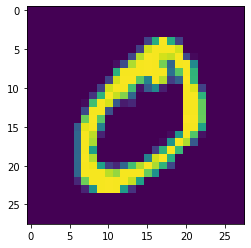

In [ ]:
plt.imshow(img)
plt.show()

### フリースペース

In [ ]:
a = np.arange(6).reshape((2,3))+15
print(a)  
b = np.array(0)
print(np.argmax(a))
print(b)

[[15 16 17]
 [18 19 20]]
5
0


In [ ]:
np.random.choice(7,4,replace=False)  
a = np.array([12,3,4])
b = np.zeros_like(a)
print(b)

[0 0 0]


In [ ]:
np.random.standard_normal((3))

array([ 0.24875263, -0.10005551,  0.08576151])

In [ ]:
np.random.standard_normal((100,10))

array([[-1.20808610e+00, -1.93215633e-02, -8.48400297e-01,
        -7.69318822e-01, -7.02762313e-01, -1.02327526e-01,
        -1.55780220e+00, -6.71409102e-01, -1.15455744e+00,
         1.13416247e+00],
       [ 8.76473239e-01,  1.46504330e+00, -9.77103768e-01,
         1.19164172e-02,  8.95830658e-01,  9.19252911e-01,
         1.18749937e+00, -2.59620164e-01,  2.33549745e-01,
        -6.59159075e-01],
       [ 1.93343099e+00,  2.21909366e-01, -1.00738934e+00,
         2.71928815e-01, -2.31216361e-01, -1.42747720e+00,
         1.25321428e+00,  2.06093178e+00,  4.50846157e-01,
         1.45696194e+00],
       [ 2.33467698e+00, -2.31324335e-01,  8.19401707e-01,
        -9.10101372e-01,  1.05197485e-01, -1.03322659e+00,
         8.20894456e-01,  2.08161485e+00,  1.40321505e+00,
         1.36993631e+00],
       [-1.46021487e+00, -1.26571724e+00, -6.03998856e-01,
        -1.13076313e-01, -5.62619994e-01,  1.24651412e-02,
        -1.52379320e-01,  4.02941019e-01,  1.00470834e+00,
        -7.